### $\color{royalblue}{\text{Осма вјежба из нумеричких метода у астрономији, датум: 05.02.2026.}} $

#### $\color{magenta}{\textit{Leapfrog.}} $ 

*Leapfrog* је симплектички интегратор, што значи да остаје очувана структура Хамилтонијанских система:

$$
\mathcal{H}=T+U=\frac{1}{2}mv^2+U(x).
$$

Другим ријечима, грешка за енергију осцилира, тј. не расте током времена. Уколико пустимо *Leapfrog* да ради

$N$ корака унапријед, и онда тај нови тренутак узмемо за почетни и покренемо процес уназад, враћамо се тачно

на почетну позицију (реверзибилност). Скраћен приказ методе дат је једначинама:

$$
x_{n+1} = x_n + v_n \Delta t + \frac{1}{2} f(x_n) \Delta t^2
$$

$$
v_{n+1} = v_n + \frac{1}{2} \left( f(x_n) + f(x_{n+1}) \right) \Delta t
$$

гдје је $f(x) = a(x)$ убрзање као функција позиције. Ово је тзв. Стормер-Верлеова форма.


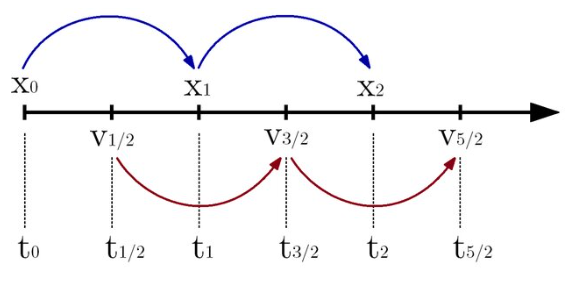

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Рјешавамо једначину $\ddot{x}+x=0$ (хармонијски осцилатор). Аналитичко рјешење је $x(t)=\sin t$, уз 

почетне услове да је $x(0)=0,\,v(0)=1$. Енергија се рачуна као $E=\frac{1}{2}mv^2+\frac{1}{2}kx^2$.

In [2]:
def f(x):
        return -x # a = -x; из једначине
    
k = 5 # број периода
N = 50 # број временских корака по периоду
h = 2*np.pi/N # корак
    
x = np.empty(k*N+1) # позиције
v = np.empty(k*N+1) # брзине
    
x[0] = 0 # почетни услови
v[0] = 1
a_novo = f(x[0])
    
# leapfrog 
for i in range(1, k*N+1):
    a_staro = a_novo
    x[i] = x[i-1] + v[i-1]*h + 0.5*a_staro*h**2
    a_novo = f(x[i])
    v[i] = v[i-1] + 0.5*(a_staro + a_novo)*h

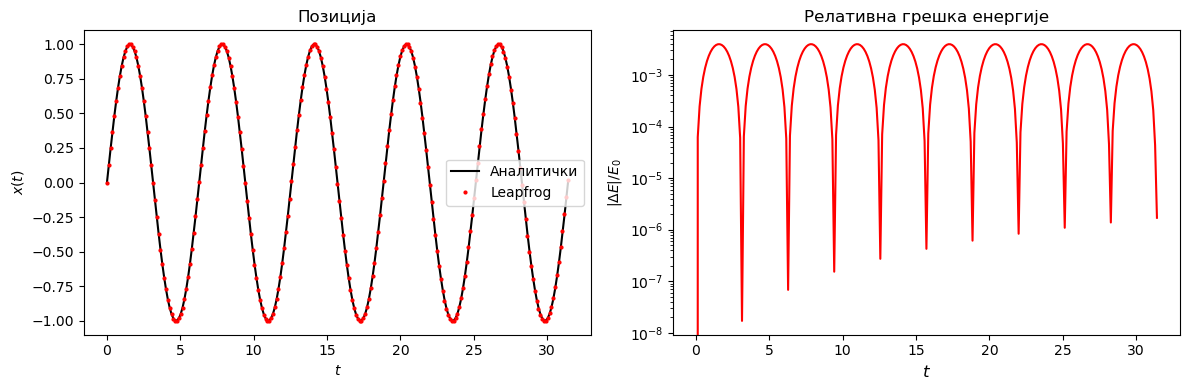

In [3]:
t = np.arange(0, k*N+1) * h

x_analiticki = np.sin(t)
v_analiticki = np.cos(t)
E_analiticki = 0.5 * v_analiticki**2 + 0.5 * x_analiticki**2
E_leapfrog = 0.5 * v**2 + 0.5 * x**2
dE_rel = np.abs(E_leapfrog - E_analiticki) / E_analiticki[0]

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(t, x_analiticki, color='black', label='Аналитички')
plt.plot(t, x, 'ro', markersize=2, label='Leapfrog')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.title('Позиција')
plt.legend()

plt.subplot(122)
plt.semilogy(t, dE_rel, color='red')
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$|\Delta E| / E_0$')
plt.title('Релативна грешка енергије')

plt.tight_layout()
plt.show()

---

Сада, бавимо се проблемом два тијела (кретање Земље око Сунца). Почетни положаји ($x_0,y_0$)

и почетне брзине $v_{x,0},v_{y,0}$ су дефинисани. Почетна енергија система рачуна се као збир потенцијалне

и кинетичке енергије:

$$
E_0 = \frac{1}{2}m\left(v_{x,0}^2 + v_{y,0}^2\right) - \frac{GMm}{\sqrt{x_0^2 + y_0^2}}.
$$

Прелазимо на "кораке" овог алгоритма:

1. рачунање убрзања из тренутног положаја:

$$
a_{x,n} = -\frac{GM}{r_n^3} \cdot x_n, \quad a_{y,n} = -\frac{GM}{r_n^3} \cdot y_n,
$$

гдје је:

$$
r_n = \sqrt{x_n^2 + y_n^2}.
$$

2. ажурирање брзине на половини корака ($t+\frac{\Delta t}{2}$):

$$
v_{x,n+\frac{1}{2}} = v_{x,n} + a_{x,n} \cdot \frac{\Delta t}{2}, \quad v_{y,n+\frac{1}{2}} = v_{y,n} + a_{y,n} \cdot \frac{\Delta t}{2}.
$$

3. ажурирање положаја на цијелом временском кораку:

$$
x_{n+1} = x_n + v_{x,n+\frac{1}{2}} \cdot \Delta t, \quad y_{n+1} = y_n + v_{y,n+\frac{1}{2}} \cdot \Delta t.
$$

4. рачунање убрзања из новог положаја:

$$
a_{x,n+1} = -\frac{GM}{r_{n+1}^3} \cdot x_{n+1}, \quad a_{y,n+1} = -\frac{GM}{r_{n+1}^3} \cdot y_{n+1}.
$$

5. рачунање нове брзине на цијелом временском кораку:

$$
v_{x,n+1} = v_{x,n+\frac{1}{2}} + a_{x,n+1} \cdot \frac{\Delta t}{2}, \quad v_{y,n+1} = v_{y,n+\frac{1}{2}} + a_{y,n+1} \cdot \frac{\Delta t}{2}.
$$

Због наизмјеничног ажурирања убрзања и брзине, грешке се минимизују.

Укупна енергија за временски корак $n+1$ једнака је:

$$
E_{n+1} = T_{n+1} + U_{n+1} = \frac{1}{2}m\left(v_{x,n+1}^2 + v_{y,n+1}^2\right) -\frac{GMm}{r_{n+1}},
$$

док је релативна грешка за енергију:

$$
\Delta E_n = \frac{E_0 - E_n}{E_0}.
$$

In [4]:
start = time.time()

M = 1.989e30 # маса Сунца [kg]
m = 5.972e24 # маса Земље [kg]
G = 6.67408e-11 # гравитациона константа [Nm²/kg²]
au = 149597870700. # астрономска јединица [m]

dt = 10 * 86400 # временски корак
tlim = 100000 * 365.25 * 86400 # дужина симулације

x0 = au # почетна позиција Земље [m]
y0 = 0
vx0 = 0
vy0 = 29.5 * 1000 # орбитална брзина Земље [m/s]

x = [x0]
y = [y0]
vx = [vx0]
vy = [vy0]

# почетна енергија
E0 = m * (vx0**2 + vy0**2)/2 - G * M * m/np.sqrt(x0**2 + y0**2)
E = [E0]
dE = [0] # релативна промјена енергије
vrijeme = [0]
t = 0

while t < tlim: # Leapfrog алгоритам
    
    ax = -G * (M/(x[-1]**2 + y[-1]**2)**(3/2)) * x[-1]
    ay = -G * (M/(x[-1]**2 + y[-1]**2)**(3/2)) * y[-1]
    
    vx12 = vx[-1] + ax * (dt/2)
    vy12 = vy[-1] + ay * (dt/2)
    
    x.append(x[-1]+vx12*dt)
    y.append(y[-1]+vy12*dt)    
    
    ax = -G * (M/(x[-1]**2 + y[-1]**2)**(3/2)) * x[-1]
    ay = -G * (M/(x[-1]**2 + y[-1]**2)**(3/2)) * y[-1]
    
    vx.append(vx12 + ax * dt/2)
    vy.append(vy12 + ay * dt/2)
    
    r = np.sqrt(x[-1]**2 + y[-1]**2)
    E.append(m * (vx[-1]**2 + vy[-1]**2)/2 - G * M * m/r)
   
    dE.append((E0 - E[-1])/E0)
    t += dt
    vrijeme.append(t)
    
end = time.time()
print(f'Вријеме извршавања за Leapfrog алгоритам: {end - start:.2f} s.')

Вријеме извршавања за Leapfrog алгоритам: 96.43 s.


In [5]:
print(len(x), len(y), len(vx), len(vy), len(E), len(dE), len(vrijeme))

3652501 3652501 3652501 3652501 3652501 3652501 3652501


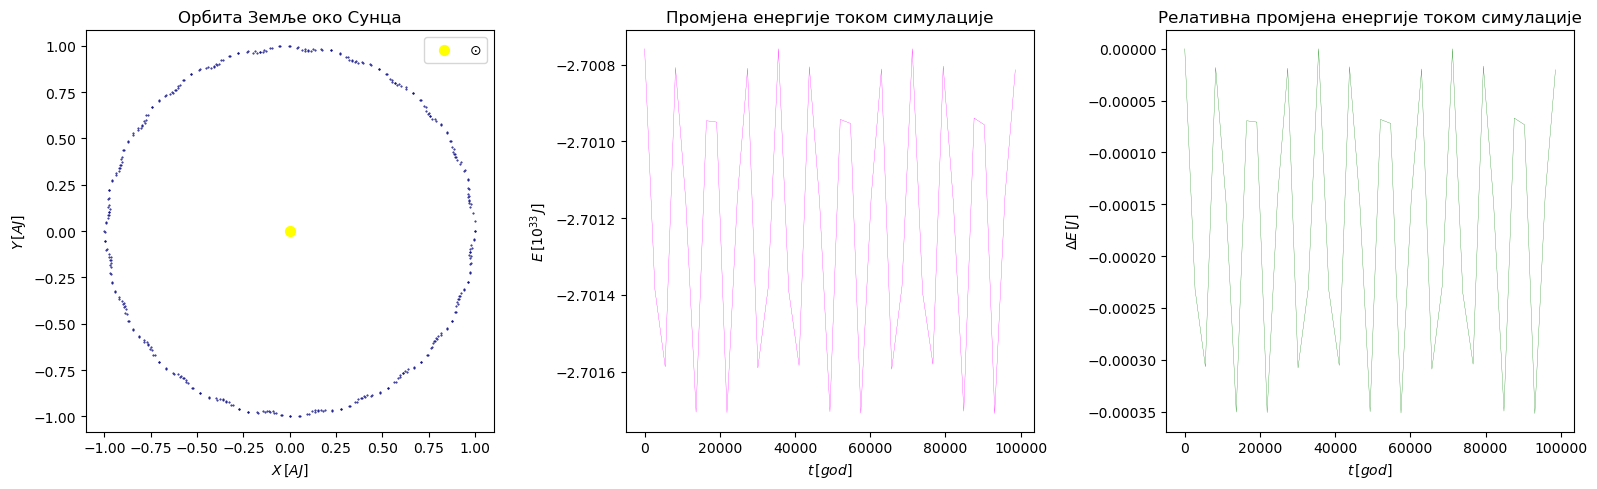

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.scatter(np.array(x)[::10000]/au, np.array(y)[::10000]/au, s=0.2, color='navy')
plt.scatter(0, 0, color='yellow', s=50, label=r'$\odot$') 
plt.xlabel(r'$X\,[AJ]$')
plt.ylabel(r'$Y\,[AJ]$')
plt.title('Орбита Земље око Сунца')
plt.axis('equal')
plt.legend()

plt.subplot(132)
plt.plot(np.array(vrijeme[::100000]) / (365.25 * 86400), np.array(E)[::100000] / 1e33, 
         color='magenta', linewidth=0.2)
plt.xlabel(r'$t\,[god]$')
plt.ylabel(r'$E\,[10^{33}\,J]$')
plt.title('Промјена енергије током симулације')

plt.subplot(133)
plt.plot(np.array(vrijeme[::100000]) / (365.25 * 86400), np.array(dE)[::100000], 
         color='green', linewidth=0.2)
plt.xlabel(r'$t\,[god]$')
plt.ylabel(r'$\Delta E\,[J]$')
plt.title('Релативна промјена енергије током симулације')

plt.tight_layout()
plt.show()

За примјер, наводимо **понашање енергије** код *Leapfrog*, Ојлерове и Ојлер-Кромерове методе:

$$
E^{lf}(t)=E_0+\mathcal{O}(\Delta t^2)\sin\omega t,
$$

$$
E^{oj}(t)=E_0+\alpha t,
$$

$$
E^{ok}(t)=E_0+\mathcal{O}(\Delta t)\sin\omega t.
$$

Код тзв. Јошидиног алгоритма (4. реда), енергија се понаша као $E^{js}(t)=E_0+\mathcal{O}(\Delta t^4)\sin\omega t$.

--- 

Сада, прелазимо на тестирање *Leapfrog* алгоритма на неком другом примјеру. Рјешавамо *проблем три тијела*

(Сатурн, Енкелад, Диона). Орбитални период Енкелада је $T_E=1.37\,d$, а Дионе $T_D=2.74\,d$.


In [7]:
ms = 5.68e26  # маса Сатурна [kg]
rs = np.array([0.0, 0.0])

me = 1.08e20 # маса Енкелада [kg]
re = np.array([2.38e8, 0]) # почетни положај Енкелада [m]
ve_orb = np.sqrt(G * ms / np.linalg.norm(re)) # провјера
print('Орбитална брзина за Енкелад', ve_orb)
ve = np.array([0, 12662.56]) # почетна брзина Енкелада [m/s]
Te = 2 * np.pi * np.sqrt(np.linalg.norm(re)**3 / (G * ms))
print(f'T за Енкелад: {Te/86400:.2f} d')


md = 1.09e21 # маса Дионе [kg]
rd = np.array([3.77396e8, 0]) # почетни положај Дионе [m]
vd_orb = np.sqrt(G * ms / np.linalg.norm(rd)) # провјера
print('Орбитална брзина за Диону', vd_orb)
vd = np.array([0, 10022.33]) # почетна брзина Дионе [m/s]
Te = 2 * np.pi * np.sqrt(np.linalg.norm(rd)**3 / (G * ms))
print(f'T за Диону: {Te/86400:.2f} d')

dt = 1
t_lim = 4 * 24 * 3600 # трајање симулације
n = t_lim/dt

Орбитална брзина за Енкелад 12620.640423761479
T за Енкелад: 1.37 d
Орбитална брзина за Диону 10022.388318270268
T за Диону: 2.74 d


 Имаћемо сљедећи низ једначина везано за убрзања (Сатурн је у исходишту [$\vec{r}_s = \vec{0}$]):


$$
\vec{a}_e = \vec{a}_{s \to e} + \vec{a}_{d \to e},

$$

$$
\vec{a}_e = G \cdot \frac{m_s}{|\vec{r}_s - \vec{r}_e|^3} \cdot (\vec{r}_s - \vec{r}_e) + G \cdot \frac{m_d}{|\vec{r}_d - \vec{r}_e|^3} \cdot (\vec{r}_d - \vec{r}_e),
$$


$$
\vec{a}_e = -G \cdot \frac{m_s}{|\vec{r}_e|^3} \cdot \vec{r}_e + G \cdot \frac{m_d}{|\vec{r}_d - \vec{r}_e|^3} \cdot (\vec{r}_d - \vec{r}_e).
$$


$$
\vec{a}_d = \vec{a}_{s \to d} + \vec{a}_{e \to d},
$$

$$
\vec{a}_d = G \cdot \frac{m_s}{|\vec{r}_s - \vec{r}_d|^3} \cdot (\vec{r}_s - \vec{r}_d) + G \cdot \frac{m_e}{|\vec{r}_e - \vec{r}_d|^3} \cdot (\vec{r}_e - \vec{r}_d),
$$


$$
\vec{a}_d = -G \cdot \frac{m_s}{|\vec{r}_d|^3} \cdot \vec{r}_d + G \cdot \frac{m_e}{|\vec{r}_e - \vec{r}_d|^3} \cdot (\vec{r}_e - \vec{r}_d).
$$


In [8]:
def ubrzanje_ukupno(r1, rs, ms, r2, m2, G, interakcija_satelita=False):
 
    r_diff_saturn  = rs - r1 # Сатурн
    r_mag_saturn = np.linalg.norm(r_diff_saturn)
    a_saturn = G * ms * r_diff_saturn / r_mag_saturn**3
    
    if interakcija_satelita:

        r_diff_mjesec = r2 - r1 # мјесец
        r_mag_mjesec = np.linalg.norm(r_diff_mjesec)
        a_mjesec = G * m2 * r_diff_mjesec / r_mag_mjesec**3
        return a_saturn + a_mjesec
    else:
        return a_saturn

In [9]:
pocetak = time.time()

def leapfrog_simulacija(G, dt, t_lim, ms, me, re, ve, md, rd, vd, interakcija_mjeseca=True):
  
    re = np.copy(re)
    ve = np.copy(ve)
    rd = np.copy(rd)
    vd = np.copy(vd)
    
    xe, ye = [re[0]], [re[1]]  # Енкелад
    xd, yd = [rd[0]], [rd[1]]  # Диона
    
    # праћење промјене убрзања
    delta_acc = []
    
    # позиција Сатурна (у исходишту)
    r_saturn = np.array([0.0, 0.0])
    
    ae = ubrzanje_ukupno(re, r_saturn, ms, rd, md, G, interakcija_mjeseca)
    ad = ubrzanje_ukupno(rd, r_saturn, ms, re, me, G, interakcija_mjeseca)

    # Leapfrog интеграција
    for _ in range(int(t_lim / dt)):
    
        ve += 0.5 * ae * dt
        vd += 0.5 * ad * dt
    
        re += ve * dt
        rd += vd * dt

        xe.append(re[0])
        ye.append(re[1])
        xd.append(rd[0])
        yd.append(rd[1])
        
        ae_novo = ubrzanje_ukupno(re, r_saturn, ms, rd, md, G, interakcija_mjeseca)
        ad_novo = ubrzanje_ukupno(rd, r_saturn, ms, re, me, G, interakcija_mjeseca)
    
        ve += 0.5 * ae_novo * dt
        vd += 0.5 * ad_novo * dt
   
        delta_acc.append(np.linalg.norm(ae_novo - ae) + np.linalg.norm(ad_novo - ad))
        
        ae, ad = ae_novo, ad_novo
    
    return xe, ye, xd, yd, delta_acc

xe, ye, xd, yd, delta_acc = leapfrog_simulacija(G, dt, t_lim, ms, me, re, ve, md, rd, vd)

kraj = time.time()
print(f'Вријеме извршавања за Leapfrog алгоритам: {kraj - pocetak:.2f} s.')

Вријеме извршавања за Leapfrog алгоритам: 57.06 s.


Велике промјене убрзања могу указивати на нумеричке грешке или неке физички неочекиване промјене. Ако се убрзања

нагло мијењају, то такође може указивати на блиске пролазе између сателита.

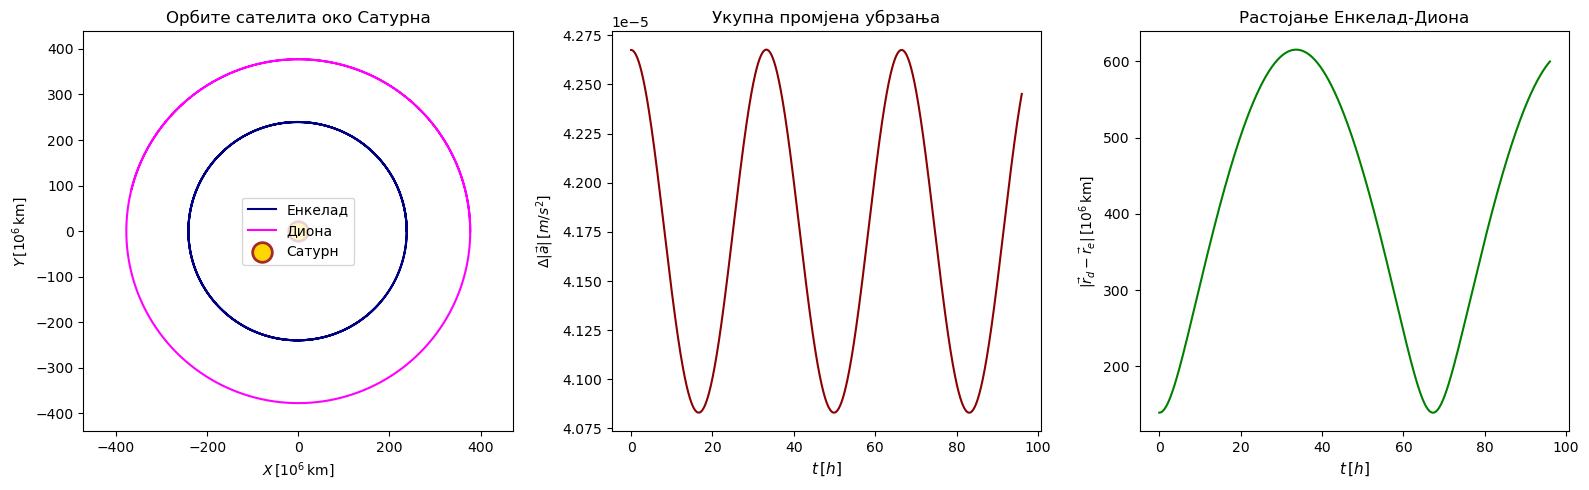

In [10]:
plt.figure(figsize=(16, 5))

plt.subplot(131)
plt.plot(np.array(xe)/1e6, np.array(ye)/1e6, label='Енкелад', color='navy')
plt.plot(np.array(xd)/1e6, np.array(yd)/1e6, label='Диона', color='magenta')
plt.scatter(0, 0, color='gold', s=200, marker='o', edgecolor='brown', linewidth=2, label='Сатурн', zorder=5)
plt.xlabel(r'$X\,[10^6\,\mathrm{km}]$')
plt.ylabel(r'$Y\,[10^6\,\mathrm{km}]$')
plt.axis('equal')
plt.legend(loc='best')
plt.title('Орбите сателита око Сатурна')

tt = np.arange(0, len(delta_acc)) * dt / 3600  

plt.subplot(132)
plt.plot(tt, delta_acc, color='darkred') 
plt.xlabel(r'$t\,[h]$', fontsize=11)
plt.ylabel(r'$\Delta |\vec{a}|\,[m/s^2]$')
plt.title('Укупна промјена убрзања')


rastojanje = np.sqrt((np.array(xe[:-1]) - np.array(xd[:-1]))**2 + (np.array(ye[:-1]) - np.array(yd[:-1]))**2)
plt.subplot(133)
plt.plot(tt, rastojanje/1e6, color='green')
plt.xlabel(r'$t\,[h]$', fontsize=11)
plt.ylabel(r'$|\vec{r}_d - \vec{r}_e|\,[10^6\,\mathrm{km}]$')
plt.title('Растојање Енкелад-Диона')

plt.tight_layout()
plt.show()

#### $\color{green}{\text{ЗАДАЦИ:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

1. Једначине кретања звијезде су: 

$$
\ddot{x} = -x - 2xy,
$$

$$
\ddot{y} = -y - x^2 + y^2.
$$

- почетни услови су: $(x_0, y_0) = (0, 0)$ и $(v_{x,0}, v_{y,0}) = (0.3, 0.4)$,
- временски корак је: $\Delta t = 0.01$,
- вријеме симулације је $t_{\text{max}} = 1000$.

Имплементирати *leapfrog* интегратор са функцијама убрзања:

   $$
   a_x = -x - 2xy, \quad a_y = -y - x^2 + y^2.
   $$

Плотовати трајекторију у ($x,y$) равни. Плотовати графике $(x, v_x)$ и $(y, v_y)$.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />